팀명: 성빈각

2016-13909	고한욱
2018-15042	김재민
2019-15039	김혜원

주제: 서울의 행정구역 별 학원 수와 아파트 가격 간의 상관관계 분석

DataFrame

In [2]:
import pandas as pd
# pandas를 import합니다.

df = pd.read_csv('academy_numbers.txt', sep = '\t', header = 0, thousands =',', usecols = [1, 3, 4])
# 'academy_numbers.txt' 파일로부터 자료를 df로 불러옵니다.
# 'academy_numbers.txt' 파일은 쥬피터 노트북을 실행한 최상위경로에 위치해야 합니다.
# 만약 Google Colab을 이용하는 경우는 'academy_numbers.txt'의 위치로 수정해줘야 합니다.
# 'header=0': 텍스트 파일의 0번째 줄부터 읽어옵니다.
# usecols=[1,3,4]: 텍스트 파일의 1, 3, 4열을 읽어옵니다.
# thousands =',' : 불러오는 값의 ','는 천의 자리 뒤에 찍히는 콤마로 취급합니다.
# encoding='utf-8': utf-8로 인코딩합니다.

df.columns = ['구명', '사설학원수', '학생1만명당 사설학원수']
# 텍스트 파일 1열의 이름은 '구명', 3열은 '사설학원수', 4열은 '학생1만명당 사설학원수'로 합니다.

df.set_index('구명', inplace = True) 
# '구명'을 index로 사용하여 inplace하면 원본 객체에 업데이트 합니다.

df['아파트 m^2당 평균가격(만원)']=[845.3 , 1003.0 , 1338.8, 1110.1, 1113.8, 767.2, 618.7, 735.9, 612.9, 603.8, 678.6, 662.4, 775.0, 1096.4, 1060.7, 829.5, 699.7, 601.1 , 1058.3, 1007.4, 728.7, 1702.5, 1950.2 , 1339.7, 957.3]
# 텍스트 파일에 포함되어 있지 않은 구별 아파트 m2당 평균가격은 pdf 파일을 참고하여 수기로 추가하였습니다.

df
# DataFrame 보기

,사설학원수,학생1만명당 사설학원수,아파트 m^2당 평균가격(만원)
구명,,,
종로구,259,149.2,845.3
중구,118,83.6,1003.0
용산구,155,92.0,1338.8
성동구,293,132.9,1110.1
광진구,406,135.5,1113.8
동대문구,368,133.8,767.2
중랑구,276,96.5,618.7
성북구,450,114.3,735.9
강북구,209,94.4,612.9


시각화 - 가로막대그래프, 대표직선이 있는 산포도

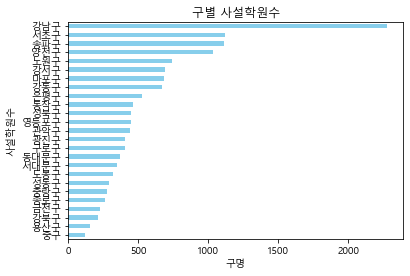

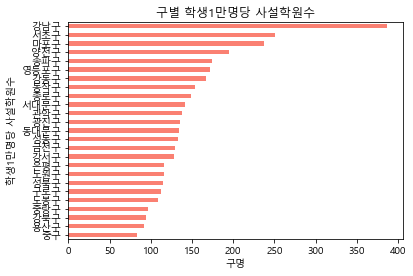

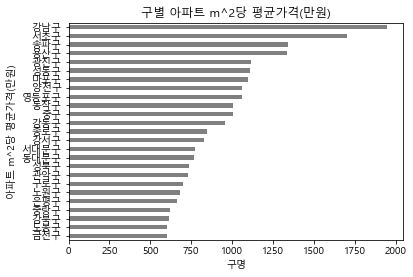

[[1.         0.72265812]
 [0.72265812 1.        ]]
[[1.         0.78095643]
 [0.78095643 1.        ]]


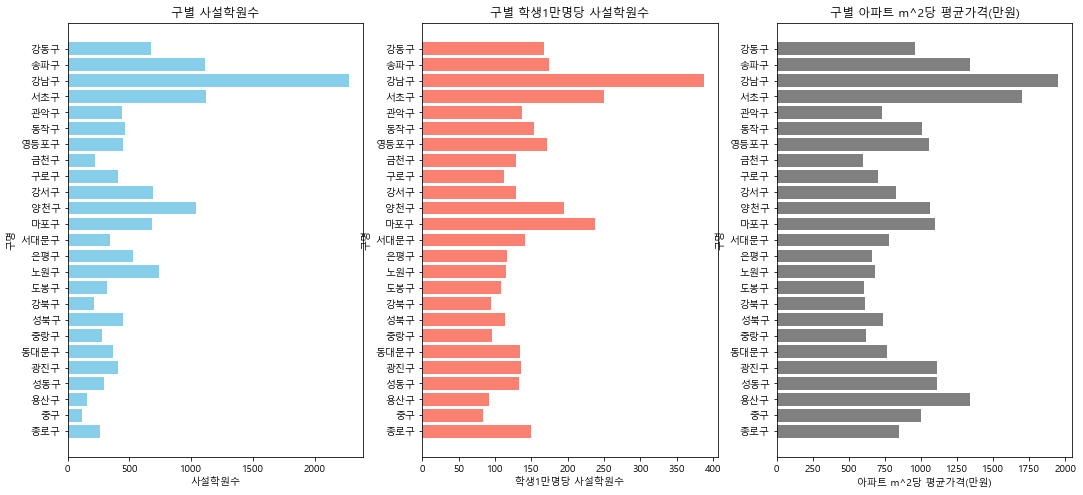

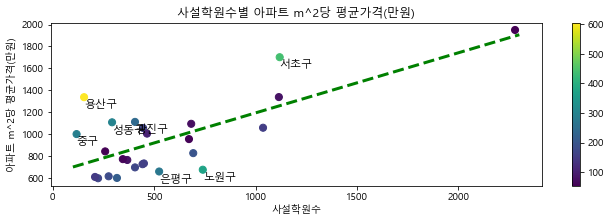

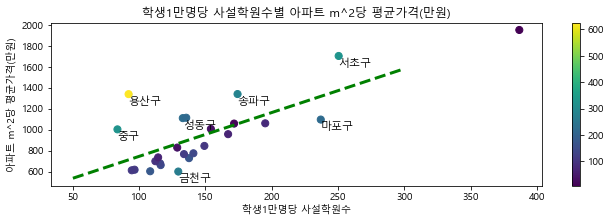

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# pandas, matplotlib, seaborn, numpy를 import합니다.

#아래는 쥬피터 노트북에서 한글 폰트가 깨지지 않게 하는 과정입니다.
import matplotlib.font_manager as fm
from matplotlib import rc
import matplotlib as mpl
font_name = fm.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False



#데이터 프레임

df = pd.read_csv('academy_numbers.txt', sep = '\t', header = 0, thousands =',', usecols = [1, 3, 4])
# 'academy_numbers.txt' 파일로부터 자료를 df로 불러옵니다.
# 'academy_numbers.txt' 파일은 쥬피터 노트북을 실행한 최상위경로에 위치해야 합니다.
# 만약 Google Colab을 이용하는 경우는 'academy_numbers.txt'의 위치로 수정해줘야 합니다.
# 'header=0': 텍스트 파일의 0번째 줄부터 읽어옵니다.
# usecols=[1,3,4]: 텍스트 파일의 1, 3, 4열을 읽어옵니다.
# thousands =',' : 불러오는 값의 ','는 천의 자리 뒤에 찍히는 콤마로 취급합니다.
# encoding='utf-8': utf-8로 인코딩합니다.

df.columns = ['구명', '사설학원수', '학생1만명당 사설학원수']
# 텍스트 파일 1열의 이름은 '구명', 3열은 '사설학원수', 4열은 '학생1만명당 사설학원수'로 합니다.
df.set_index('구명', inplace=True) 
# '구명'을 index로 사용하여 inplace하면 원본 객체에 업데이트 합니다.

df['아파트 m^2당 평균가격(만원)']=[845.3 , 1003.0 , 1338.8, 1110.1, 1113.8, 767.2, 618.7, 735.9, 612.9, 603.8, 678.6, 662.4, 775.0, 1096.4, 1060.7, 829.5, 699.7, 601.1 , 1058.3, 1007.4, 728.7, 1702.5, 1950.2 , 1339.7, 957.3]
# 텍스트 파일에 포함되어 있지 않은 구별 아파트 m2당 평균가격은 pdf 파일을 참고하여 수기로 추가하였습니다.


df
# DataFrame 보기


#시각화 
#1.'구별 사설학원수', '구별 학생1만명당 사설학원수', '구별 아파트 m2당 평균가격(만원)'  가로막대그래프 만들기 

    #1) '구별 사설학원수 가로막대그래프' 만들기

df['사설학원수'].sort_values().plot(kind='barh', color='skyblue')   
plt.title('구별 사설학원수')
plt.ylabel('사설학원수')
plt.xlabel('구명')
plt.show()
#sort_values(): 데이터를 정렬합니다. 만약 ascending=False로 설정하면 내림차순으로 할 수 있지만, 이 그래프는 오름차순으로 하였습니다.
#.plot(kind='barh'): 가로막대그래프를 그립니다.
# color='skyblue': 색깔을 지정합니다.
#plt.title('구별 사설학원수'): 그래프의 제목을 붙입니다.
#plt.ylabel('사설학원수'):그래프 y축의 이름을 붙입니다.
#plt.xlabel('구명'):그래프 x축의 이름을 붙입니다.
#plt.show(): 그래프 보기


    #2) '구별 학생1만명당 사설학원수 가로막대그래프' 만들기

df['학생1만명당 사설학원수'].sort_values().plot(kind='barh', color='salmon')
plt.title('구별 학생1만명당 사설학원수')
plt.ylabel('학생1만명당 사설학원수')
plt.xlabel('구명')
plt.show()
#sort_values(): 데이터를 정렬합니다. 만약 ascending=False로 설정하면 내림차순으로 할 수 있지만, 이 그래프는 오름차순으로 하였습니다.
#.plot(kind='barh'): 가로막대그래프를 그립니다.
# color='salmon': 색깔을 지정합니다.
#plt.title('구별 학생1만명당 사설학원수'): 그래프의 제목을 붙입니다.
#plt.ylabel('학생1만명당 사설학원수'):그래프 y축의 이름을 붙입니다.
#plt.xlabel('구명'):그래프 x축의 이름을 붙입니다.
#plt.show():그래프 보기



    #3) '구별 아파트 m2당 평균가격(만원) 가로막대그래프' 만들기

df['아파트 m^2당 평균가격(만원)'].sort_values().plot(kind='barh', color='grey')
plt.title('구별 아파트 m^2당 평균가격(만원)')
plt.ylabel('아파트 m^2당 평균가격(만원)')
plt.xlabel('구명')
plt.show()
#sort_values(): 데이터를 정렬합니다. 만약 ascending=False로 설정하면 내림차순으로 할 수 있지만, 이 그래프는 오름차순으로 하였습니다.
#.plot(kind='barh'): 가로막대그래프를 그립니다.
#color='grey': 색깔을 지정합니다.
#plt.title('구별 아파트 m2당 평균가격(만원)'): 그래프의 제목을 붙입니다.
#plt.ylabel('아파트 m2당 평균가격(만원)'):그래프 y축의 이름을 붙입니다.
#plt.xlabel('구명'):그래프 x축의 이름을 붙입니다.
#plt.show():그래프 보기


    #4) 1),2),3)에서 만든 3개의 그래프를 같이 보여주기

fig = plt.figure(figsize=(18,8))
sub1 = fig.add_subplot(1,3,1)
sub2 = fig.add_subplot(1,3,2)
sub3 = fig.add_subplot(1,3,3)
#plt.figure()함수를 fig라는 변수에 저장하고, fig.add_subplot()괄호 안에 숫자를 넣어 가로(행) 칸 1개, 세로(열) 칸 3개, 그리고 각각의 그래프 위치를 지정합니다.
#figsize=(18,8))로 가로 크기 18인치,세로 크기 8인치로 지정하였습니다.

sub1.barh(df.index, df['사설학원수'],color='skyblue')
sub1.set(ylabel='구명', xlabel='사설학원수')
#그래프가 들어갈 첫 번째 공간인 sub1에'구별 사설학원수' 그래프를 넣고자 합니다.
#sub1.barh(): 가로막대그래프를 그립니다.
#color='skyblue': skyblue 색으로 지정하였습니다.
#sub1.set(ylabel='구명', xlabel='사설학원수'): y축과 x축의 이름을 지정했습니다.


sub2.barh(df.index, df['학생1만명당 사설학원수'],color='salmon')
sub2.set(ylabel='구명', xlabel='학생1만명당 사설학원수')
#그래프가 들어갈 두 번째 공간인 sub2에'구별 학생1만명당 사설학원수' 그래프를 넣고자 합니다.
#sub2.barh(): 가로막대그래프를 그립니다.
#color='salmon': salmon 색으로 지정하였습니다.
#sub2.set(ylabel='구명', xlabel='학생1만명당 사설학원수'): y축과 x축의 이름을 지정했습니다.



sub3.barh(df.index, df['아파트 m^2당 평균가격(만원)'],color='grey')
sub3.set(ylabel='구명', xlabel='아파트 m^2당 평균가격(만원)')
#그래프가 들어갈 세 번째 공간인 sub3에'구별 아파트 m2당 평균가격(만원)' 그래프를 넣고자 합니다.
#sub3.barh(): 가로막대그래프를 그립니다.
#color='grey': grey 색으로 지정하였습니다.
#sub3.set(ylabel='구명', xlabel='아파트 m2당 평균가격(만원)'): y축과 x축의 이름을 지정했습니다.


sub1.set_title('구별 사설학원수')
sub2.set_title('구별 학생1만명당 사설학원수')
sub3.set_title('구별 아파트 m^2당 평균가격(만원)')
#각 그래프의 제목을 달았습니다.

fig
#1),2),3)에서 만든 3개의 그래프를 같이 보여주기


#2. 구별 사설학원수와 아파트 가격 사이의 상관관계, 구별 학생1만명당 사설학원수와 아파트 가격 사이의 상관관계를 대표직선이 있는 산포도로 그리기

    #1) 구별 사설학원수와 아파트 가격 사이의 상관관계, 구별 학생1만명당 사설학원수와 아파트 가격 사이의 상관관계 구하기
    
print(np.corrcoef(df['사설학원수'], df['아파트 m^2당 평균가격(만원)'])) 
print(np.corrcoef(df['학생1만명당 사설학원수'], df['아파트 m^2당 평균가격(만원)'])) 
#corrcoef( ): 상관 계수 행렬을 반환합니다.


    #2)구별 사설학원수와 아파트 가격 사이의 상관관계를 대표직선이 있는 산포도로 그리기 
    
df.plot(kind='scatter', x='사설학원수', y='아파트 m^2당 평균가격(만원)', figsize=(11,3))
plt.title('사설학원수별 아파트 m^2당 평균가격(만원)')
#df.plot(kind='scatter', x='사설학원수', y='아파트 m2당 평균가격(만원)', figsize=(11,3)): 종류는 산포도로 하고. x축과 y축을 지정하고, 크기를 지정합니다.
#plt.title('사설학원수별 아파트 m2당 평균가격(만원)'): 그래프 제목을 붙입니다.


fp = np.polyfit(df['사설학원수'], df['아파트 m^2당 평균가격(만원)'], 1) #사설학원수와 아파트 m2당 평균가격의 일차방정식의 계수를 구합니다.
f = np.poly1d(fp)   #poly1d() 함수를 이용해 일차다항식 함수를 반환합니다. f에는 일차다항식 해서 나온 결과가 들어있습니다.
fx = np.linspace(100, 2300, 100)   #라인 스페이스를 100부터 2300까지 100 단위로 나누어줍니다.
plt.plot(fx, f(fx), ls='dashed', lw=3, color='g')
#대표직선을 그려줍니다. 라인 스타일은 대시 선으로, 색은 초록색으로 해줍니다.

df['오차'] = np.abs(df['아파트 m^2당 평균가격(만원)'] - f(df['사설학원수'])) #오차를 구합니다.
df.sort_values(by='오차', ascending=False, inplace = True)   
#구한 오차에 따라 데이터를 정렬하되,ascending=False으로 내림차순으로 정렬합니다.
#inplace=True로 원본 데이터에 업데이트합니다.


for n in range(7):
    plt.text(df['사설학원수'][n], df['아파트 m^2당 평균가격(만원)'][n]-100, df.index[n], fontsize = 11)
plt.scatter(df['사설학원수'], df['아파트 m^2당 평균가격(만원)'], s = 50, c = df['오차'])
plt.colorbar()
plt.show()
#오차 상위 7개의 구명을 그래프에 표시해주려 합니다.
#for문을 활용해,사설학원수에서 n번째 해당하는 값과 아파트 m2당 평균가격에서 n번째 해당하는 값-100을 구하고, 그것을 구명을 표시할 (x, y) 좌표로 씁니다.
#plt.scatter(df['사설학원수'], df['아파트 m2당 평균가격(만원)'], s = 50, c = df['오차']): 산포도의 점 크기와 점 색깔을 지정합니다.
#plt.colorbar(): 컬러 바를 드러냅니다.
#plt.show(): 그래프 보여주기



    #3)구별 학생1만명당 사설학원수와 아파트 가격 사이의  상관관계를 대표직선이 있는 산포도로 그리기
    
df.plot(kind='scatter', x='학생1만명당 사설학원수', y='아파트 m^2당 평균가격(만원)',figsize=(11,3))
plt.title('학생1만명당 사설학원수별 아파트 m^2당 평균가격(만원)')
#df.plot(kind='scatter', x='학생1만명당 사설학원수', y='아파트 m2당 평균가격(만원)', figsize=(11,3)): 종류는 산포도로 하고. x축과 y축을 지정하고, 크기를 지정합니다.
#plt.title('학생1만명당 사설학원수별 아파트 m2당 평균가격(만원)'): 그래프 제목을 붙입니다.


fp = np.polyfit(df['학생1만명당 사설학원수'], df['아파트 m^2당 평균가격(만원)'], 1) #학생1만명당 사설학원수와 아파트 m2당 평균가격의 일차방정식의 계수를 구합니다.
f = np.poly1d(fp)    #poly1d() 함수를 이용해 일차다항식 함수를 반환합니다. f에는 일차다항식 해서 나온 결과가 들어있습니다.
fx = np.linspace(50, 300, 20)  #라인 스페이스를 50부터 300까지 20 단위로 나누어줍니다.
plt.plot(fx, f(fx), ls='dashed', lw=3, color='g')
#대표직선을 그려줍니다. 라인 스타일은 대시 선으로, 색은 초록색으로 해줍니다.

df['오차'] = np.abs(df['아파트 m^2당 평균가격(만원)'] - f(df['학생1만명당 사설학원수']))
df.sort_values(by='오차', ascending=False, inplace = True) 
#구한 오차에 따라 데이터를 정렬하되,ascending=False으로 내림차순으로 정렬합니다.
#inplace=True로 원본 데이터에 업데이트합니다.


for n in range(7):
    plt.text(df['학생1만명당 사설학원수'][n], df['아파트 m^2당 평균가격(만원)'][n]-100, df.index[n], fontsize = 11)
plt.scatter(df['학생1만명당 사설학원수'], df['아파트 m^2당 평균가격(만원)'], s = 50, c = df['오차'])
plt.colorbar()
plt.show()
#오차 상위 7개의 구명을 그래프에 표시해주려 합니다.
#for문을 활용해,사설학원수에서 n번째 해당하는 값과 아파트 m2당 평균가격에서 n번째 해당하는 값-100을 구하고, 그것을 구명을 표시할 (x, y) 좌표로 씁니다.
#plt.scatter(df['학생1만명당 사설학원수'], df['아파트 m2당 평균가격(만원)'], s = 50, c = df['오차']): 산포도의 점 크기와 점 색깔을 지정합니다.
#plt.colorbar(): 컬러 바를 드러냅니다.
#plt.show(): 그래프 보여주기
